In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)



ERROR:tensorflow:An interactive session is already active. This can cause out-of-memory errors or some other unexpected errors (due to the unpredictable timing of garbage collection) in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s). Please use `tf.Session()` if you intend to productionize.


In [4]:
#import the Libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

#import matplotlib.pyplot as plt


In [6]:
#re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Desktop/Tomato/New Plant Diseases Dataset(Augmented)/Train'

In [7]:
# Import the Inception V3 16 Library as shown below and add preprocessing Layer to the front
#Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights= 'imagenet', include_top=False)


In [8]:
#don't train existing weights 
for layer in inception.layers: 
    layer.trainable = False


In [9]:
#useful for getting number of output classes 
folders = glob('Desktop/Tomato/New Plant Diseases Dataset(Augmented)/Train')

In [10]:
len(folders)

1

In [11]:
#our Layers you can add more if you want 
x = Flatten()(inception.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

#create a model object
model = Model(inputs=inception.input, outputs=prediction)


In [13]:
# view the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 111, 111, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 111, 111, 32)      │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 111, 111, 32)      │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 109, 109, 32)      │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 109, 109, 32)      │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 109, 109, 32)      │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 109, 109, 64)      │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 109, 109, 64)      │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 109, 109, 64)      │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 54, 54, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 54, 54, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 54, 54, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 54, 54, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 52, 52, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 21,853,985 (83.37 MB)

 Trainable params: 51,201 (200.00 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [14]:
#tell the model what cost and optimization method to use
model.compile(
loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'] 
)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


In [16]:
#Make sure you provide the same target size os initialied for the image size
training_set = train_datagen.flow_from_directory('Desktop/Tomato/New Plant Diseases Dataset(Augmented)/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [17]:
import os
print(os.path.exists('Desktop/Tomato/New Plant Diseases Dataset(Augmented)/Valid'))


True


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
    'Desktop/Tomato/New Plant Diseases Dataset(Augmented)/Valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 4585 images belonging to 10 classes.


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 1. Define ImageDataGenerator for training and test sets
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 2. Load datasets
training_set = train_datagen.flow_from_directory(
    'Desktop/Tomato/New Plant Diseases Dataset(Augmented)/Train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    'Desktop/Tomato/New Plant Diseases Dataset(Augmented)/Valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Automatically get the number of classes
num_classes = training_set.num_classes

# 3. Define the model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', 
           input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Dynamically set number of classes
])

# 4. Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Train the model
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


C:\Users\OM\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\OM\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 667s 1s/step - accuracy: 0.5541 - loss: 1.8088 - val_accuracy: 0.8650 - val_loss: 0.3954
Epoch 2/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 371s 647ms/step - accuracy: 0.8971 - loss: 0.3179 - val_accuracy: 0.8225 - val_loss: 0.5479
Epoch 3/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 368s 641ms/step - accuracy: 0.9533 - loss: 0.1407 - val_accuracy: 0.9080 - val_loss: 0.2749
Epoch 4/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 365s 637ms/step - accuracy: 0.9818 - loss: 0.0577 - val_accuracy: 0.8558 - val_loss: 0.5186
Epoch 5/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 424s 739ms/step - accuracy: 0.9788 - loss: 0.0629 - val_accuracy: 0.8613 - val_loss: 0.4539
Epoch 6/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 375s 653ms/step - accuracy: 0.9913 - loss: 0.0314 - val_accuracy: 0.8521 - val_loss: 0.5757
Epoch 7/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 367s 639ms/step - accuracy: 0.9790 - loss: 0.0666 - val_accuracy: 0.8829 - val_loss: 0.4980
Epoch 8/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 434s 756ms/step - accuracy: 0.9865 - lo

In [21]:
print(f"Training samples: {training_set.samples}")
print(f"Validation samples: {test_set.samples}")
print(f"Training batches: {len(training_set)}")
print(f"Validation batches: {len(test_set)}")


Training samples: 18345
Validation samples: 4585
Training batches: 574
Validation batches: 144


In [20]:
test_set = test_datagen.flow_from_directory(
    'Desktop/Tomato/New Plant Diseases Dataset(Augmented)/Valid',        
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)


Found 4585 images belonging to 10 classes.


In [23]:
training_set.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [24]:
training_set.classes

array([0, 0, 0, ..., 9, 9, 9])

In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Your trained Keras model (make sure it's loaded beforehand)
# Example:
# from tensorflow.keras.models import load_model
# model = load_model('your_model_path.h5')

# Class index mapping from training_set.class_indices
class_indices = {
    'Tomato___Bacterial_spot': 0,
    'Tomato___Early_blight': 1,
    'Tomato___Late_blight': 2,
    'Tomato___Leaf_Mold': 3,
    'Tomato___Septoria_leaf_spot': 4,
    'Tomato___Spider_mites Two-spotted_spider_mite': 5,
    'Tomato___Target_Spot': 6,
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
    'Tomato___Tomato_mosaic_virus': 8,
    'Tomato___healthy': 9
}
# Reverse mapping for prediction decoding
index_to_class = {v: k for k, v in class_indices.items()}

# Path to test image folder
dir_path = 'Desktop/Tomato/New Plant Diseases Dataset(Augmented)/Valid'

# Loop through all images in the test folder
for filename in sorted(os.listdir(dir_path)):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(dir_path, filename)

        # Load and preprocess image
        img = image.load_img(img_path, target_size=(200, 200))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0  # normalize

        # Predict
        prediction = model.predict(img_array, verbose=0)
        predicted_index = np.argmax(prediction)
        predicted_label = index_to_class[predicted_index]
        confidence = np.max(prediction) * 100

        # Display result
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{filename} ➜ {predicted_label}\nConfidence: {confidence:.2f}%")
        print(f"{filename}: Predicted as {predicted_label} ({confidence:.2f}%)")
        plt.show()


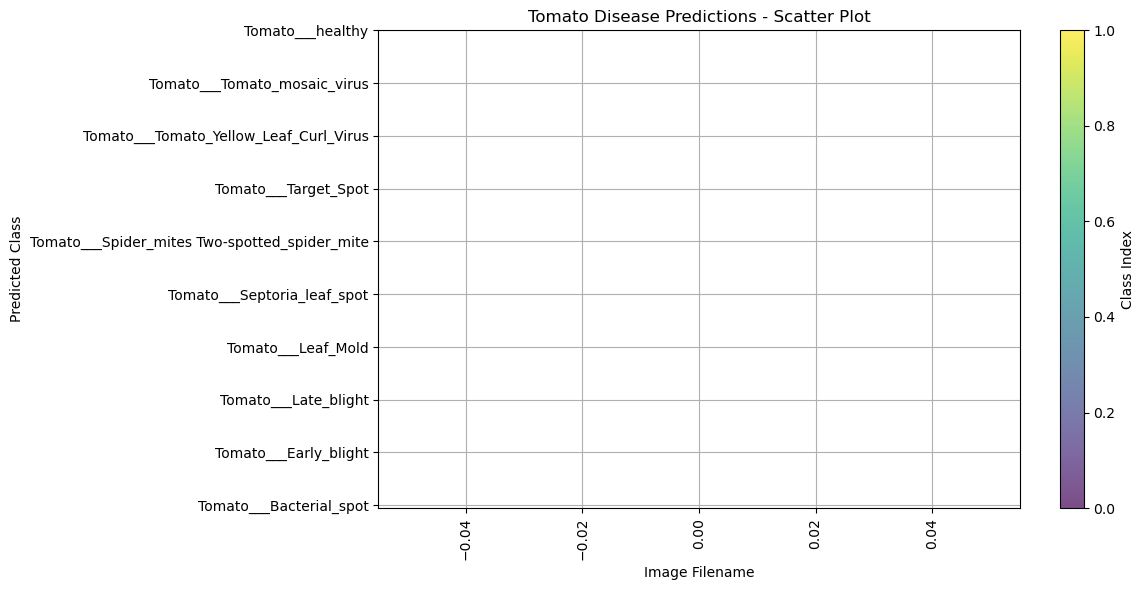

In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load model
# from tensorflow.keras.models import load_model
# model = load_model('your_model.h5')

# Class index mapping
class_indices = {
    'Tomato___Bacterial_spot': 0,
    'Tomato___Early_blight': 1,
    'Tomato___Late_blight': 2,
    'Tomato___Leaf_Mold': 3,
    'Tomato___Septoria_leaf_spot': 4,
    'Tomato___Spider_mites Two-spotted_spider_mite': 5,
    'Tomato___Target_Spot': 6,
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
    'Tomato___Tomato_mosaic_virus': 8,
    'Tomato___healthy': 9
}
index_to_class = {v: k for k, v in class_indices.items()}

# Prepare data for scatter plot
filenames = []
predicted_indices = []
confidences = []

# Directory
dir_path = 'Desktop/Tomato/New Plant Diseases Dataset(Augmented)/Valid'

for filename in sorted(os.listdir(dir_path)):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(dir_path, filename)

        # Load and preprocess
        img = image.load_img(img_path, target_size=(200, 200))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0

        # Predict
        prediction = model.predict(img_array, verbose=0)
        predicted_index = np.argmax(prediction)
        confidence = np.max(prediction) * 100

        # Store for plotting
        filenames.append(filename)
        predicted_indices.append(predicted_index)
        confidences.append(confidence)

        print(f"{filename}: {index_to_class[predicted_index]} ({confidence:.2f}%)")

# Plot scatter
plt.figure(figsize=(12, 6))
scatter = plt.scatter(filenames, predicted_indices, c=predicted_indices, s=confidences, cmap='viridis', alpha=0.7)
plt.xticks(rotation=90)
plt.yticks(list(index_to_class.keys()), list(index_to_class.values()))
plt.colorbar(label='Class Index')
plt.title('Tomato Disease Predictions - Scatter Plot')
plt.xlabel('Image Filename')
plt.ylabel('Predicted Class')
plt.grid(True)
plt.tight_layout()
plt.show()


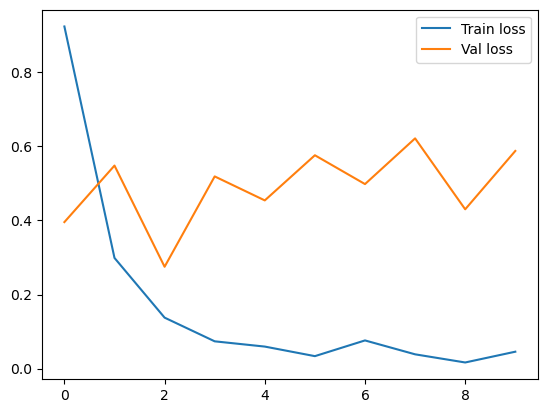

<Figure size 640x480 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt

#plotting the loss
plt.plot(r.history['loss'], label='Train loss')
plt.plot(r.history['val_loss'], label='Val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

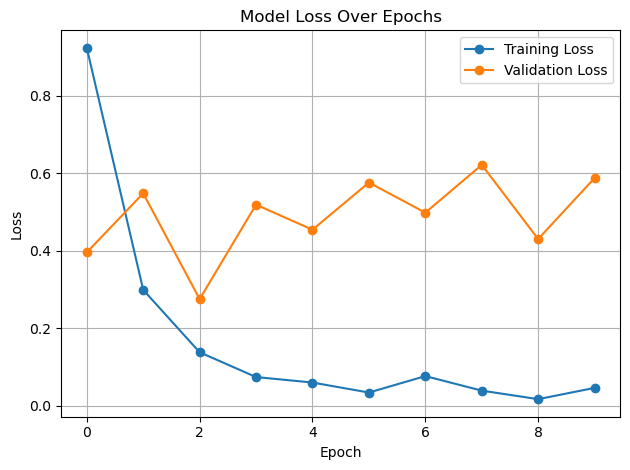

In [35]:
plt.plot(r.history['loss'], label='Training Loss', marker='o')
plt.plot(r.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
